# <center>Trabajo Práctico Computacional 5:<br>Comunidades</center>

Grupo 9: Facundo Joaquı́n Garcı́a, Agustı́n Brusco, Eitan Sprejer

# Cloning Repo for Data and Imports

In [1]:
import os
directory_path = os.getcwd()
folder_name = os.path.basename(directory_path)
if folder_name == 'content':  # in default colab folder
    if 'CoNet' not in os.listdir():
        !git clone https://github.com/facundojgarcia02/CoNet.git
    os.chdir(r"/content/CoNet/TP5")


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import igraph as ig
import pandas as pd

from matplotlib import rcParams
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'cm'
rcParams['figure.dpi'] = 100
rcParams['legend.fontsize'] = 10
rcParams['axes.labelsize'] = 'large'

CUSTOM_FORMAT = {"with_labels" : False,
                 "node_size": 10, "node_color": "red", "edgecolors": "black",
                 "linewidths": 0.25, "width": 0.25, "edge_color": "black"}

def custom_draw(graph, ax,
                cmap: str = 'viridis',
                size_degree: bool = False,
                **kwargs):
    k_vals = np.array([k for i, k in graph.degree()])
    norm = plt.Normalize(k_vals.min(), k_vals.max())
    colorscale = plt.cm.ScalarMappable(norm, cmap, )
    if size_degree:
        nx.draw(graph, with_labels=False,
                node_size=10*np.log(1+k_vals/k_vals.max()) +  4,
                node_color=colorscale.to_rgba(k_vals),
                edgecolors="black", edge_color="black",
                linewidths=0.25, width=0.25,
                ax=ax, **kwargs)
    else:
        nx.draw(graph, with_labels=False,
                node_size=10,
                node_color=colorscale.to_rgba(k_vals),
                edgecolors="black", edge_color="black",
                linewidths=0.25, width=0.25,
                ax=ax, **kwargs)
    return colorscale

# 2) Red de Coexpresión Génica

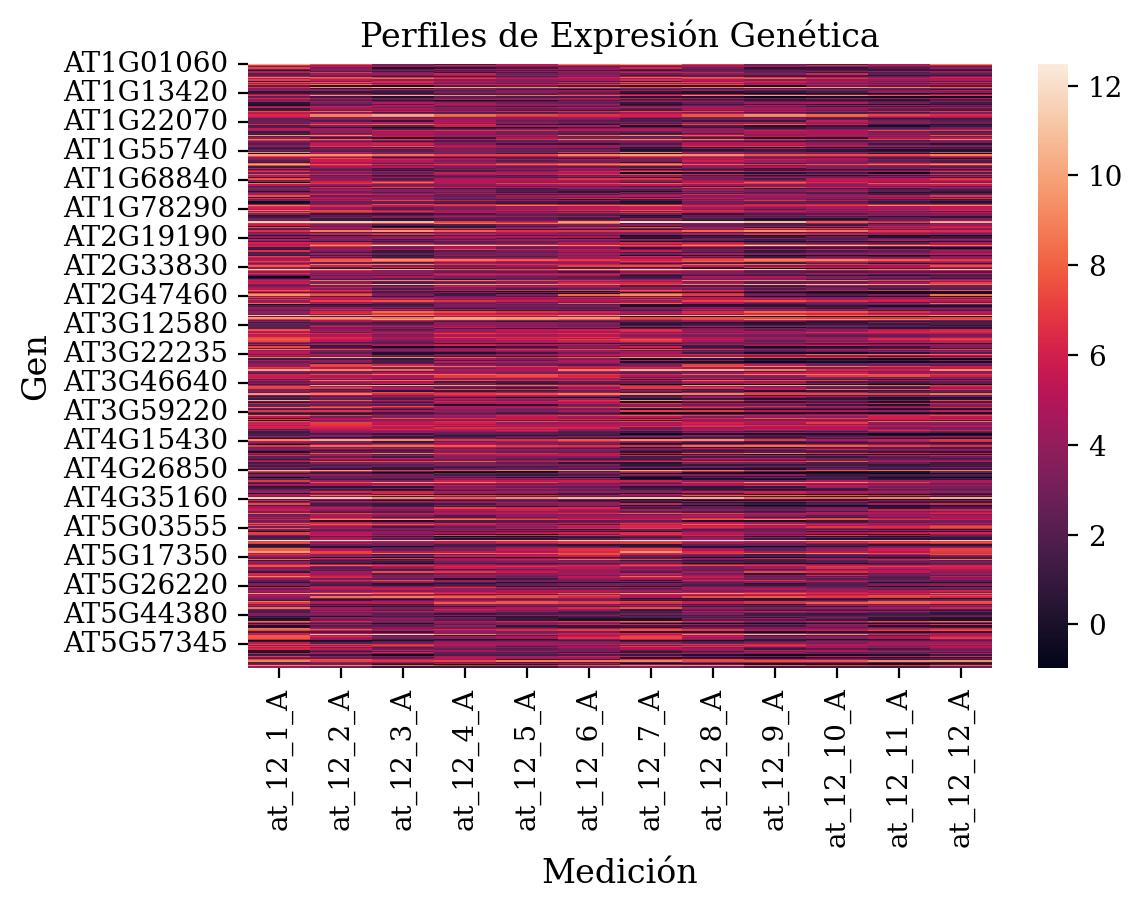

In [2]:
genex_df = pd.read_csv("datasets/geneX.csv", index_col=0)

sns.heatmap(genex_df)
plt.title("Perfiles de Expresión Genética")
plt.ylabel("Gen")
plt.xlabel("Medición")
plt.show()

## a) $s_{ij} = \frac{1 + \mathrm{corr}(A_i,\ A_j)}{2}$

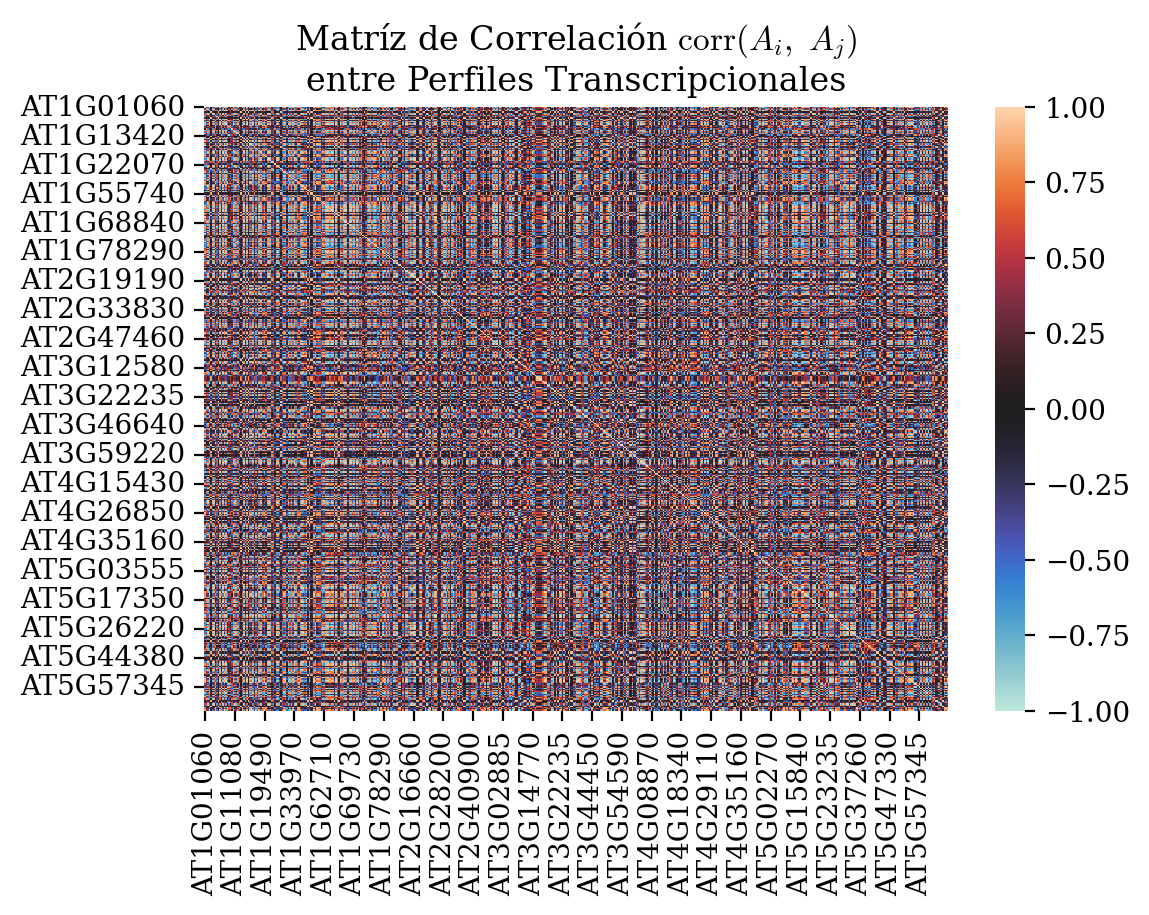

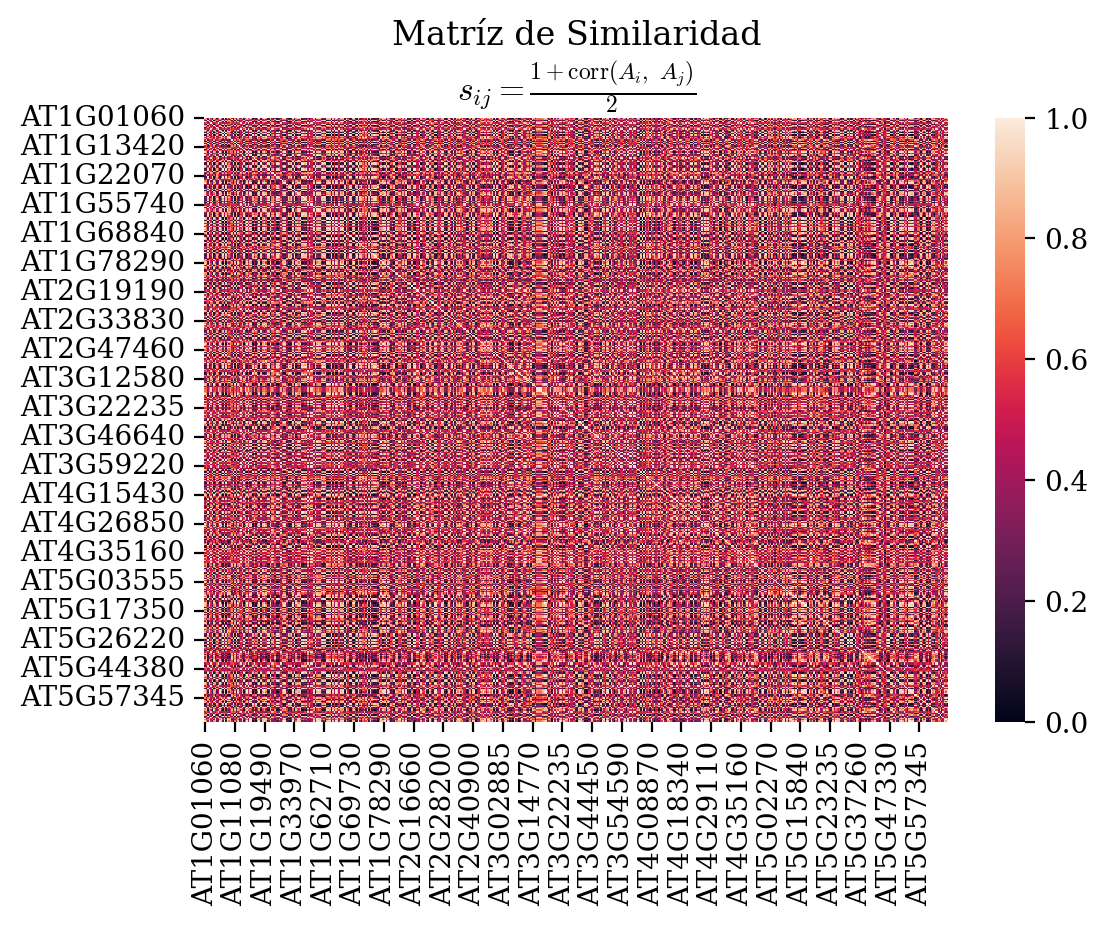

In [3]:
genex_corr = genex_df.T.corr('pearson')
genex_sim = (1 + genex_corr)/2

sns.heatmap(genex_corr, vmin=-1, vmax=1, cmap="icefire")
plt.title("Matríz de Correlación $\\mathrm{corr}(A_i,\\ A_j)$\nentre Perfiles Transcripcionales")
plt.show()

sns.heatmap(genex_sim, vmin=0, vmax=1, cmap="rocket")
plt.title("Matríz de Similaridad\n$s_{ij} = \\frac{1 + \\mathrm{corr}(A_i,\\ A_j)}{2}$")
plt.show()

El elemento $i, j$ de la matriz de correlación se corresponde con la correlación de Pearson entre las vectores-fila $\vec{A_i},\ \vec{A_j}$ de la matriz de expresión génica. Esto es:

\begin{align*}
\mathrm{corr}(A_i,\ A_j) & = \frac{\sum \left(A_{ik} - \langle A_i \rangle \right) \left(A_{jk} - \langle A_j \rangle \right)}{\sqrt{\sum \left(A_{ik} - \langle A_i \rangle \right)^2 \cdot \sum \left(A_{jk} - \langle A_j \rangle \right)^2}} \\
& = \frac{\left(\vec{A_i} - \langle A_i \rangle \right)\cdot \left(\vec{A_j} - \langle A_j \rangle \right)}{||\vec{A_i} - \langle A_i \rangle|| \cdot ||\vec{A_j} - \langle A_j \rangle||} \\
& = \frac{\cos(\theta)||\vec{A_i} - \langle A_i \rangle|| \cdot ||\vec{A_j} - \langle A_j \rangle||}{||\vec{A_i} - \langle A_i \rangle|| \cdot ||\vec{A_j} - \langle A_j \rangle||} = \cos(\theta),
\end{align*}
donde $\theta$ es el ángulo entre los vectores $\vec{A_i}$ y $\vec{A_j}$. Así expresado es fácil notar que $\mathrm{corr}$ toma valores entre $-1$ y $1$ al igual que el coseno.

Luego, para definir una similiridad $s_{ij} \in [0, 1]$ de forma que valga $1$ si los genes $i$ y $j$ presentan respuestas identicas y $0$ en caso de que presenten respuestas completamente opuestas, tiene sentido definir la similaridad del enunciado:

\begin{align*}
s_{ij} & = \frac{1 + \mathrm{corr}(A_i,\ A_j)}{2} \\
& = \frac{1 + \cos(\theta)}{2}.
\end{align*}

Es notable sin embargo que genes cuya respuesta no presente correlación tendrán una similaridad de $0.5$, lo que indica la necesidad de establecer un umbrál alto a la hora de utilizar esta medida de similitud para definir conexiones entre genes.

## b) $a_{ij} = \Theta(s_{ij}-0,\!95)$

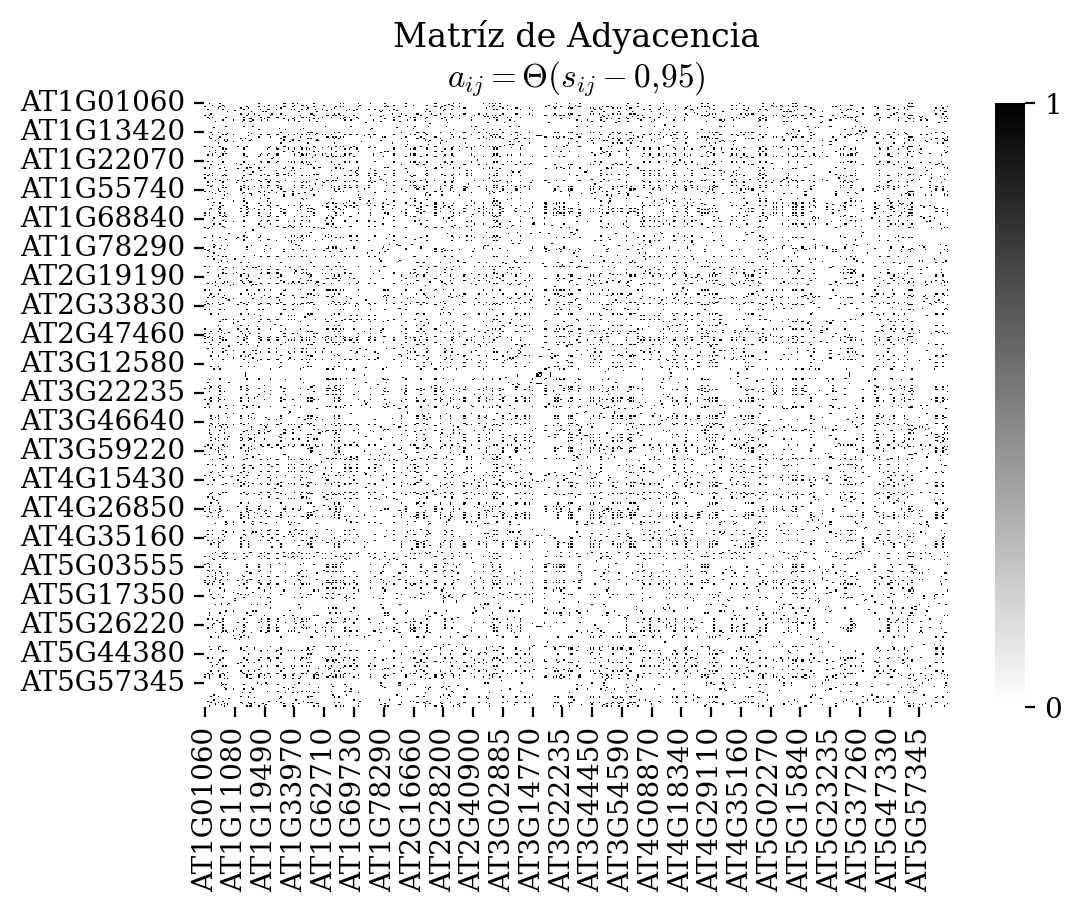

In [4]:
genex_adj = (genex_sim >= 0.95).astype(int) - np.identity(genex_sim.shape[0])


ax = sns.heatmap(genex_adj, cmap="binary", cbar_kws=dict(ticks=[0, 1]))
plt.title("Matríz de Adyacencia\n$a_{ij} = \\Theta(s_{ij}-0,\\!95)$")
plt.show()

In [76]:
np.concatenate([list(comp.nodes) for comp in net_components[1:]])

array(['AT1G04770', 'AT5G48850', 'AT5G24660', 'AT4G21990', 'AT5G03350',
       'AT3G22235', 'AT2G14560', 'AT2G19800', 'AT3G30775', 'AT4G19030',
       'AT2G23910', 'AT1G24147', 'AT1G27020', 'AT1G68840', 'AT1G73010',
       'AT1G80440', 'AT2G04050', 'AT2G15960', 'AT2G25900', 'AT2G36750',
       'AT2G40610', 'AT2G46270', 'AT3G11340', 'AT3G13310', 'AT3G22740',
       'AT3G28270', 'AT4G12490', 'AT4G12500', 'AT4G35770', 'AT4G38860',
       'AT5G05410', 'AT5G07990', 'AT5G20250', 'AT5G24030', 'AT5G36910',
       'AT5G41080', 'AT5G44590', 'AT5G45340', 'AT5G56870', 'AT5G62480'],
      dtype='<U9')

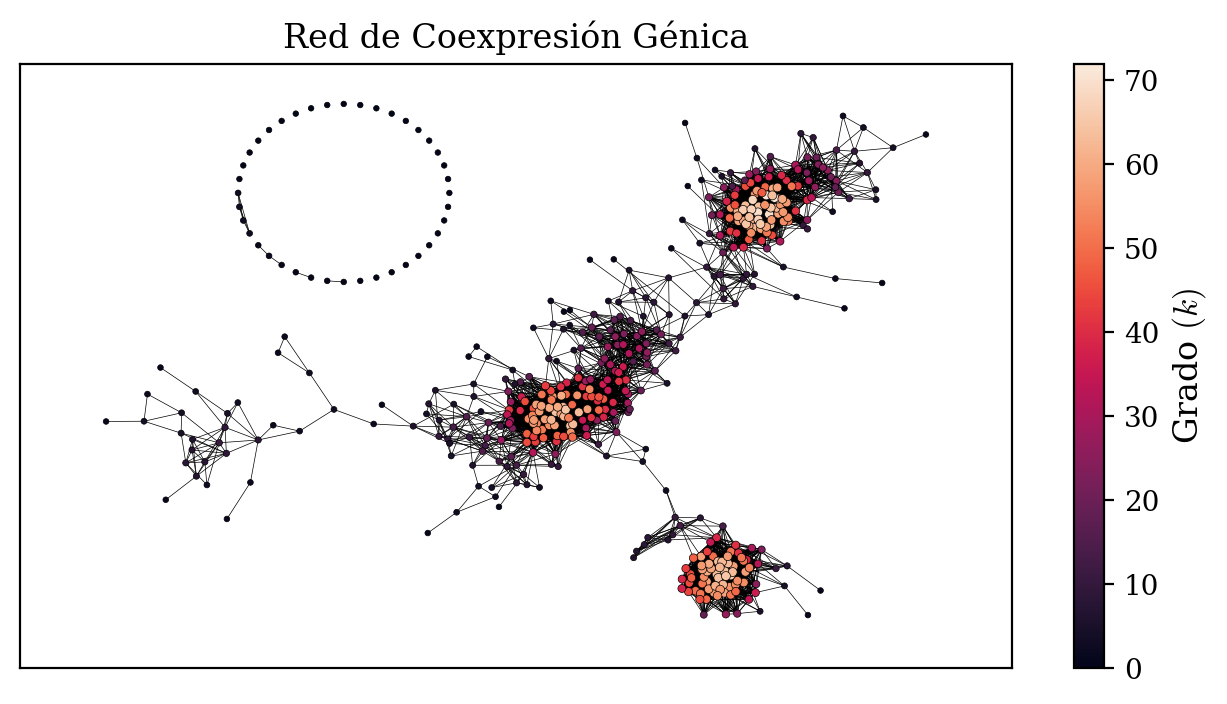

In [101]:
genex_nx = nx.from_pandas_adjacency(genex_adj, create_using=nx.Graph, )

# Custom Layout:
net_components = [genex_nx.subgraph(c).copy() for c in sorted(nx.connected_components(genex_nx),
                                                               key=len, reverse=True)]
custom_layout = nx.shell_layout(genex_nx,
                                [list(net_components[0].nodes), 
                                 np.concatenate([list(comp.nodes) for comp in net_components[1:]])],
                                scale=0.2, center=(-0.55, 0.4), rotate=np.pi/2)
for node, coords in nx.kamada_kawai_layout(net_components[0],
                                           pos=custom_layout,
                                           scale=1).items():
    custom_layout[node] = coords

# Gráfico:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
degree_scale = custom_draw(genex_nx, ax, sns.color_palette("rocket", as_cmap=True), 
                           size_degree=True, pos=custom_layout)
    
ax.axis(True)
ax.set_title("Red de Coexpresión Génica")
plt.colorbar(degree_scale, label="Grado $(k)$")
plt.show()

## c) Clusters

In [84]:
def cluster_to_dict(clusters, G) -> dict:
    """
    Arma un diccionario con los nombres de los nodos
    como keys y el id del cluster como valor.
    """
    dic = {}
    for i, cluster in enumerate(sorted(list(clusters), key = len, reverse = True)):
        for node in cluster:
            dic[G.vs[node]['_nx_name']] = i
    return dic

In [85]:
genex_ig = ig.Graph.from_networkx(genex_nx) # Versión de igraph de la red.
genex_infomap = cluster_to_dict(genex_ig.community_infomap(), genex_ig)
genex_fastgreedy = cluster_to_dict(genex_ig.community_fastgreedy(weights=None).as_clustering(),
                                   genex_ig)
particiones = {"Fast greedy": genex_fastgreedy, 
               "Infomap": genex_infomap}

In [131]:
from collections import Counter
Counter(list(particiones["Infomap"].values()))

Counter({0: 91,
         1: 72,
         2: 71,
         3: 39,
         4: 33,
         5: 29,
         6: 24,
         7: 20,
         8: 17,
         9: 10,
         10: 10,
         11: 8,
         12: 5,
         13: 5,
         14: 5,
         15: 4,
         16: 4,
         17: 4,
         18: 4,
         19: 3,
         20: 3,
         21: 2,
         22: 2,
         23: 2,
         24: 2,
         25: 2,
         26: 1,
         27: 1,
         28: 1,
         29: 1,
         30: 1,
         31: 1,
         32: 1,
         33: 1,
         34: 1,
         35: 1,
         36: 1,
         37: 1,
         38: 1,
         39: 1,
         40: 1,
         41: 1,
         42: 1,
         43: 1,
         44: 1,
         45: 1,
         46: 1,
         47: 1,
         48: 1,
         49: 1,
         50: 1,
         51: 1,
         52: 1,
         53: 1,
         54: 1})

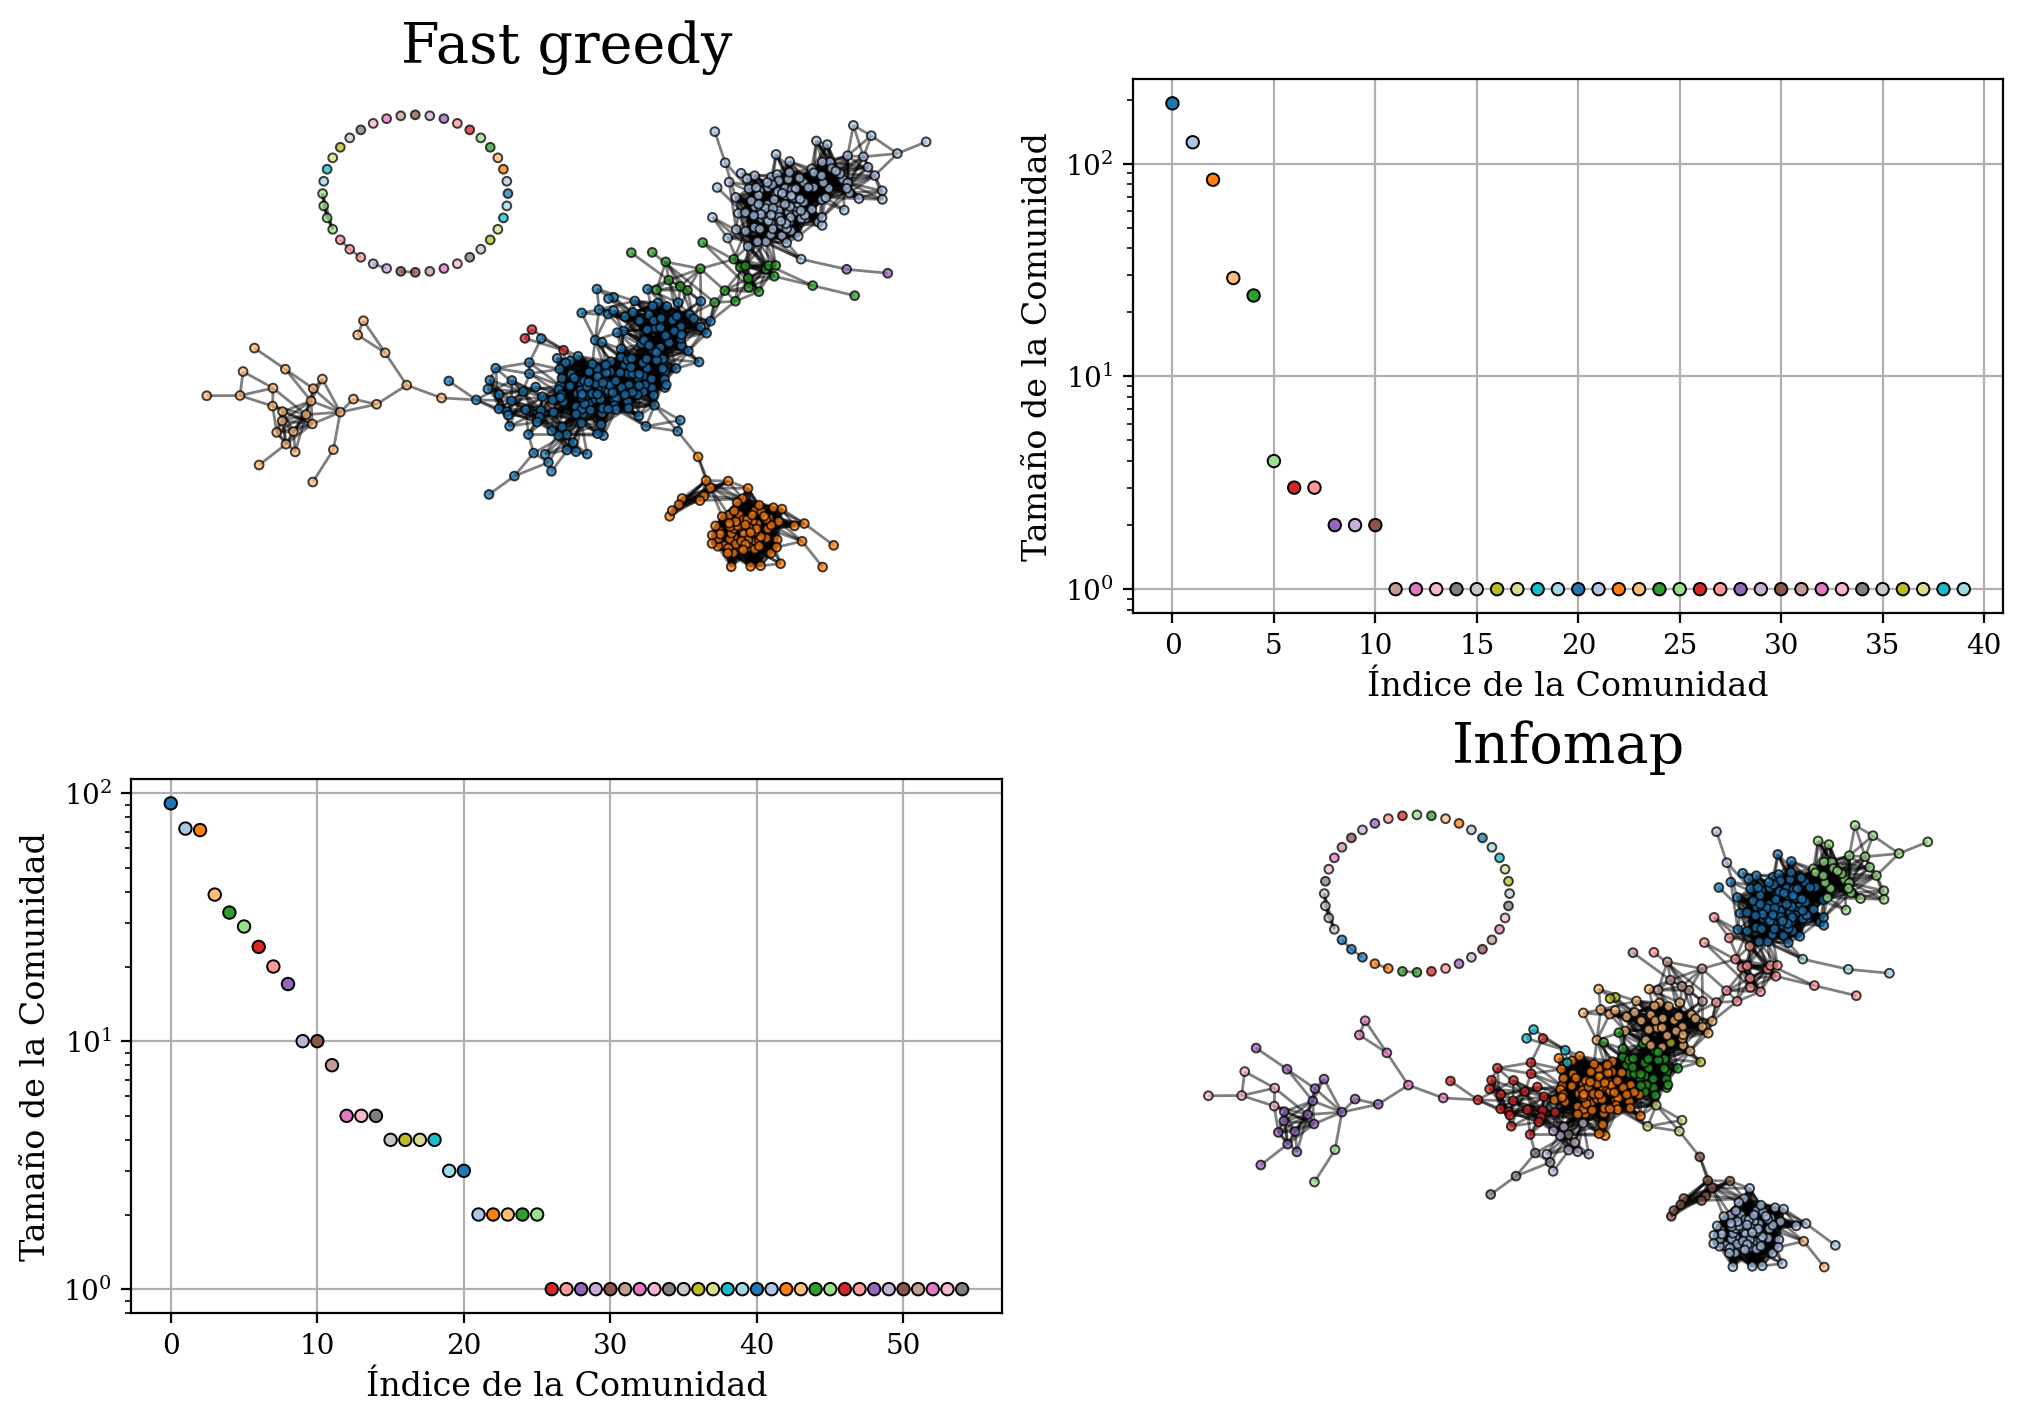

In [160]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7), constrained_layout=True, facecolor='w')
cmap = "tab20"
for i, (ax_row, tag) in enumerate(zip(axs, particiones.keys())):
    nx.draw_networkx_nodes(genex_nx,
                           pos=custom_layout,
                           node_color=[plt.get_cmap(cmap)(particiones[tag][v]%20)
                                       for v in genex_nx.nodes()],
                           ax=ax_row[i],
                           alpha=0.75, node_size=10, edgecolors="black", linewidths=0.7)
    nx.draw_networkx_edges(genex_nx,
                           pos=custom_layout,
                           ax=ax_row[i],
                           alpha=0.5)
    ax_row[i].set_title(tag, fontsize=20)
    ax_row[i].axis('off')
    
    partition_sizes = Counter(list(particiones[tag].values()))

    ax_row[i-1].scatter(partition_sizes.keys(), partition_sizes.values(),
                        c=[plt.get_cmap(cmap)(id%20) for id in partition_sizes.keys()],
                        marker="o", s=20, edgecolor='k', linewidths=0.7, zorder=5)
    # sns.histplot(partition_sizes, ax=ax_row[i-1])
    # ax_row[i-1].set_xscale("log")
    ax_row[i-1].set_yscale("log")
    ax_row[i-1].grid(True)
    ax_row[i-1].set_ylabel("Tamaño de la Comunidad")
    ax_row[i-1].set_xlabel("Índice de la Comunidad")
plt.show()